# [9660] Homework # 4 - Random Forest - Solution
Data file:
* https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/diabetes_patients_readmissions_2500.csv

## Homework Submission Rules (for all homework assignments)
* Homework is due by 6:05 PM on the due date
  * No late submission will be accepted
* You must submit a cleanly executed notebook (*.ipynb)
  * Verify that you are submitting the correct homework file
* Homework file naming convention
  * LastName_FirstName_HwX.ipynb  [Replace X with the homework #]
    * 1 point deducted for submitting homework not complying with naming convention
* Before submission, execute "Kernel -> Restart Kernel and Run All Cells"
  * 1 point deducted for not submitting a cleanly executed notebook

## Homework #4 Requirements
* Part 1:
  * Load data
    * Do NOT use meaningless columns (e.g. 'visit_ID', 'patient_ID') as independent variables
  * Clean and prepare data for model training
  * Display the first few rows of the final set of independent variables used for all the model trainings
  * Display RandomForestClassifier model default hyperparameters
  * Train RandomForestClassifier model with default hyperparameters
  * Print model accuracy
  * Print confusion matrix
* Part 2: The objective is to improve performance to exceed that of the model with default hyperparameters
  * If you used hyperparameter random_state in your initial model training, do NOT change this value during model retrainings
  * Do NOT re-split training and test sets during model retrainings
  * Prepare hyperparameter variables for grid/random search
  * Setup and print grid/random search hyperparameter variables grid
  * Setup and execute grid/random search with k-fold cross validation using the hyperparameter variables grid
  * Print best hyperparameters combination
  * Print model accuracy from the best hyperparameters combination
  * Print confusion matrix

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 04/28/25 23:30:59


### Import libraries

In [2]:
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

## Part 1

### Load data

### Diabetic Patients' Re-admission Prediction  
Source Data: Diabetes patients across 130-US hospitals between 1999-2008  

Problem Statement: To identify the factors that lead to the high readmission rate of diabetic patients within 30 days post discharge and correspondingly to predict the high-risk diabetic-patients who are most likely to get readmitted within 30 days so that the quality of care can be improved along with improved patient’s experience, health of the population and reduce costs by lowering readmission rates. Also, to identify the medicines that are the most effective in treating diabetes.

Independent variables
* visit_ID
* patient_ID
* gender
* age
* days_in_hospital
* num_lab_procedures
* num_non_lab_procedures
* num_medications
* num_outpatient_visits
* num_ER_visits
* num_inpatient_visits
* num_diagnoses
* A1Cresult
* diabetes_meds_prescribed

Dependent variable  
* readmitted


In [3]:
# Read diabetes_patients_readmissions_15K.csv into dataframe
#  NOTE: Field separator is '|'
df=pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/diabetes_patients_readmissions_2500.csv',sep='|')

### Examine data

In [4]:
df.shape

(2500, 15)

In [5]:
df.head()

,visit_ID,patient_ID,gender,age,days_in_hospital,num_lab_procedures,num_non_lab_procedures,num_medications,num_outpatient_visits,num_ER_visits,num_inpatient_visits,num_diagnoses,A1Cresult,diabetes_meds_prescribed,readmitted
0,236316,40523301,Male,80-100,6,64,3,18,0,0,0,7,High,Yes,NO
1,955884,93196251,Female,60-80,5,34,0,17,0,0,1,7,High,Yes,>30
2,1257282,84488562,Female,40-60,2,53,0,6,0,0,0,3,High,Yes,NO
3,1270524,67897251,Male,60-80,1,59,0,12,0,0,0,7,Norm,Yes,NO
4,1455252,96440301,Female,80-100,3,34,0,11,0,0,0,8,Norm,No,>30


### Prepare data for model training

In [6]:
df.isnull().sum()

,0
visit_ID,0
patient_ID,0
gender,34
age,68
days_in_hospital,0
num_lab_procedures,0
num_non_lab_procedures,0
num_medications,0
num_outpatient_visits,0
num_ER_visits,0


In [ ]:
df=df.drop((['visit_ID','patient_ID']),axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
imp_most_freq=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [ ]:
df[['gender']]=imp_most_freq.fit_transform(df[['gender']])

In [ ]:
df[['age']]=imp_most_freq.fit_transform(df[['age']])

In [ ]:
df = pd.get_dummies(df, columns=['gender'], dtype=int)

In [ ]:
df = pd.get_dummies(df, columns=['age'], dtype=int)

In [ ]:
df.isnull().sum()

,0
days_in_hospital,0
num_lab_procedures,0
num_non_lab_procedures,0
num_medications,0
num_outpatient_visits,0
num_ER_visits,0
num_inpatient_visits,0
num_diagnoses,0
A1Cresult,0
diabetes_meds_prescribed,0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

df['A1Cresult'].unique()

array(['High', 'Norm'], dtype=object)

In [ ]:
oe= OrdinalEncoder(categories=[['High','Norm']])
df['A1Cresult'] = oe.fit_transform(df[['A1Cresult']])

In [ ]:
df['diabetes_meds_prescribed'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
oe= OrdinalEncoder(categories=[['No','Yes']])
df['diabetes_meds_prescribed'] = oe.fit_transform(df[['diabetes_meds_prescribed']])

In [ ]:
le=LabelEncoder()
df['readmitted'] = le.fit_transform(df['readmitted'])

In [ ]:
# Display the first few rows of the final set of independent variables used for all the model trainings
df.head()

,days_in_hospital,num_lab_procedures,num_non_lab_procedures,num_medications,num_outpatient_visits,num_ER_visits,num_inpatient_visits,num_diagnoses,A1Cresult,diabetes_meds_prescribed,readmitted,gender_Female,gender_Male,age_0-20,age_20-40,age_40-60,age_60-80,age_80-100
0,6,64,3,18,0,0,0,7,0.0,1.0,2,0,1,0,0,0,0,1
1,5,34,0,17,0,0,1,7,0.0,1.0,1,1,0,0,0,0,1,0
2,2,53,0,6,0,0,0,3,0.0,1.0,2,1,0,0,0,1,0,0
3,1,59,0,12,0,0,0,7,1.0,1.0,2,0,1,0,0,0,1,0
4,3,34,0,11,0,0,0,8,1.0,0.0,1,1,0,0,0,0,0,1


### Separate independent variables and dependent variable
* Independent variables: all remaining variables except 'readmitted'
* Dependent variable: 'readmitted'

In [ ]:
df_independent = df.drop('readmitted',axis=1)
df_dependent = df['readmitted']

### Split into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_independent, df_dependent, stratify=df_dependent, test_size=0.25, random_state=42)

### Instantiate the RandomForestClassifier model

In [ ]:
model=RandomForestClassifier(random_state=42)

### Print RandomForestClassifier default hyperparameters

In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Fit RandomForestClassifier model using the default hyperparameters


In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

### Evaluate performance for RandomForestClassifier (with default hyperparameters)

In [ ]:
# Predict using the test set
predictions = model.predict(X_test)

In [ ]:
# Print baseline accuracy score
acc_score= accuracy_score(y_test, predictions)
print(f"Accuracy = {round((acc_score * 100), 4)}%")

Accuracy = 55.36%


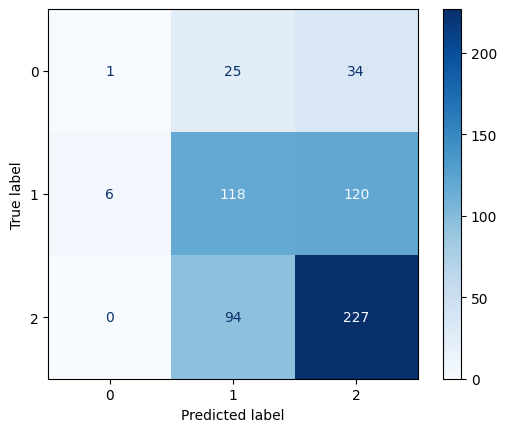

In [ ]:
# Display confusion matrix with class labels
cnf_matrix = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Part 2

### NOTE: The objective of the hyperparameter search is to improve model performance above the default hyperparameters

### Prepare variables for hyperparameter search
* Choose at least 3 random forest classifier hyperparameters for grid search
* For each hyperparameter selected, set up an array of values
  * For example: max_features = ['log2', 'sqrt']

In [ ]:
max_depth=[int(x) for x in np.linspace(3,20,num=5)]
min_samples_leaf=np.arange(1,10,3)
max_features = ['log2', 'sqrt']

### Create the hyperparameter grid for the grid search
Use the variables prepared above

In [ ]:
grid = {'max_depth': max_depth,
        'min_samples_leaf': min_samples_leaf,
        'max_features': max_features
       }

### Print the hyperparameter grid for the grid search

In [ ]:
pprint(grid)

{'max_depth': [3, 7, 11, 15, 20],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': array([1, 4, 7])}


### Set up grid search with k-fold cross validation using the hyperparameter grid

In [ ]:
gs = GridSearchCV(model, param_grid=grid,
                  scoring="accuracy", verbose=1,
                  n_jobs=-1, cv=10, return_train_score=True)

### Fit the grid search model
Be patient, this might take several minutes

In [ ]:
gs.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 7, 11, 15, 20],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([1, 4, 7])},
             return_train_score=True, scoring='accuracy', verbose=1)

### Print the best hyperparameters found by the grid search

In [ ]:
gs.best_params_

{'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 4}

### Print best grid search model accuracy

In [ ]:
print(f'Mean cross-validated training accuracy score: {np.round(gs.best_score_,4)*100}%')

Mean cross-validated training accuracy score: 56.75%


In [ ]:
# Predict with best estimator using the test set
y_pred = gs.best_estimator_.predict(X_test)

In [ ]:
# Print model accuracy score
print("Test accuracy:", np.round(accuracy_score(y_test, y_pred), 4))

Test accuracy: 0.5616


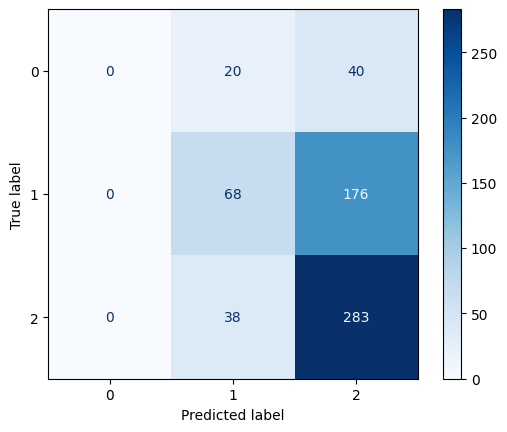

In [ ]:
# Display confusion matrix with class labels
cnf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,
                              display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()